In [2]:
import random
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.rcsetup as mrc

In [61]:
brfss = pd.read_csv("BRFSS_SAMPLE.csv")

In [62]:
brfss.head()

,Unnamed: 0,Unnamed: 1,ID,YEAR,_LLCPWT2,IMONTH,B_ASTHMA,B_CANCER,B_CHCCOPD,B_ADDEPEV,...,L_AGE_G,L_SEX,L_IMPRACE,L_RACE,L_EMPLOY1,L_MARITAL,L_INCOMG,L_EDUCAG,L_BMI5CAT,L_IMONTH
0,LLCP2019.csv,157049,2019157049,2019,111.259862,8,0,1,0,1,...,35-44,FEMALE,White,WHITE,UNABLE,MARRIED,<$15K,SOME COLLEGE,OBESE,August
1,LLCP2017.csv,311874,2017311874,2017,65.035142,11,0,0,0,0,...,65+,FEMALE,White,WHITE,RETIRED,MARRIED,$50K+,HS GRAD,OBESE,November
2,LLCP2018.csv,2590,20182590,2018,652.453294,2,0,0,0,1,...,25-34,FEMALE,White,WHITE,UNABLE,WIDOWED,<$15K,< HS,OBESE,February
3,LLCP2018.csv,10380,201810380,2018,224.436106,11,0,1,0,1,...,65+,FEMALE,White,WHITE,RETIRED,DIVORCED,<$15K,< HS,OBESE,November
4,LLCP2019.csv,219696,2019219696,2019,1865.812139,7,0,0,0,1,...,18-24,MALE,White,WHITE,EMPLOYED,SEPARATED,$50K+,HS GRAD,NORMAL WEIGHT,July


In [63]:
brfss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 44 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50000 non-null  object 
 1   Unnamed: 1  50000 non-null  int64  
 2   ID          50000 non-null  int64  
 3   YEAR        50000 non-null  int64  
 4   _LLCPWT2    50000 non-null  float64
 5   IMONTH      50000 non-null  int64  
 6   B_ASTHMA    50000 non-null  int64  
 7   B_CANCER    50000 non-null  int64  
 8   B_CHCCOPD   50000 non-null  int64  
 9   B_ADDEPEV   50000 non-null  int64  
 10  B_DIABETE   50000 non-null  int64  
 11  B_HEART     50000 non-null  int64  
 12  COMORB_1    50000 non-null  int64  
 13  TOTCHRONIC  50000 non-null  int64  
 14  CHRONICGRP  50000 non-null  int64  
 15  _STATE      50000 non-null  int64  
 16  _AGEG5YR    50000 non-null  int64  
 17  _AGE_G      50000 non-null  int64  
 18  SEX         49945 non-null  float64
 19  _IMPRACE    50000 non-nul

In [64]:
pd.crosstab(brfss["CHRONICGRP"], brfss["TOTCHRONIC"])

TOTCHRONIC,0,1,2,3,4,5,6
CHRONICGRP,,,,,,,
0,28146,0,0,0,0,0,0
1,0,14314,0,0,0,0,0
2,0,0,5176,0,0,0,0
3,0,0,0,1754,492,103,15


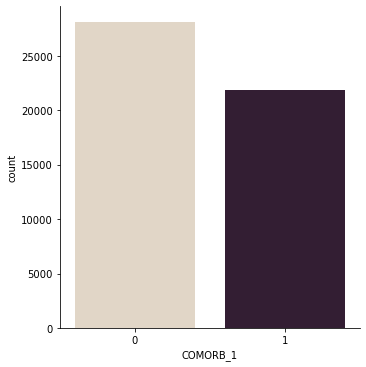

In [65]:
sb.catplot(x="COMORB_1", kind="count", palette="ch:.25", data=brfss)

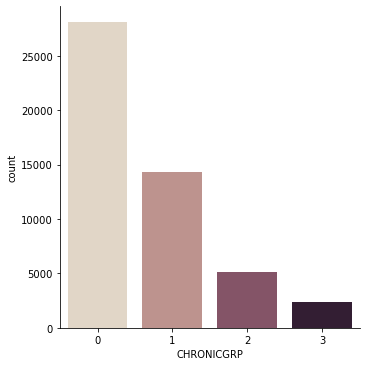

In [66]:
sb.catplot(x="CHRONICGRP", kind="count", palette="ch:.25", data=brfss)

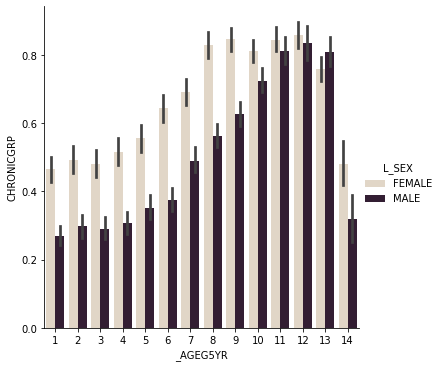

In [67]:
# 13 Age Groups broken out by SEX; group 14 is blank/NA
sb.catplot(x="_AGEG5YR", y="CHRONICGRP", hue="L_SEX", kind="bar", palette="ch:.25", data=brfss)

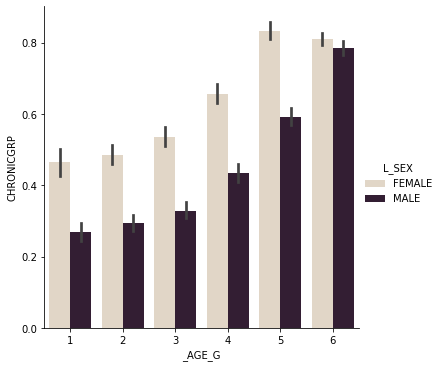

In [68]:
# 6 AGE GROUPS 1 18-25, 2 25-34, 3 35-44, 4 45-54, 5 55-64, 6 65+
sb.catplot(x="_AGE_G", y="CHRONICGRP", hue="L_SEX", kind="bar", palette="ch:.25", data=brfss)

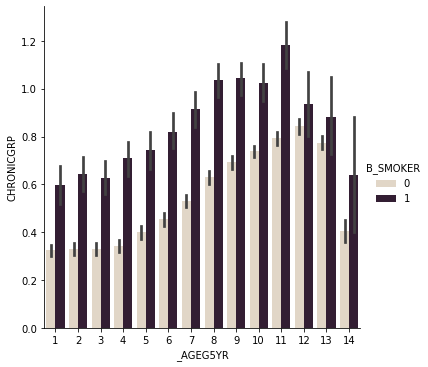

In [69]:
# 13 Age Groups broken out by SMOKING STATUS; group 14 is blank/NA; 0 is Non-Smoker
sb.catplot(x="_AGEG5YR", y="CHRONICGRP", hue="B_SMOKER", kind="bar", palette="ch:.25", data=brfss)

<AxesSubplot:xlabel='CHRONICGRP', ylabel='Proportion'>

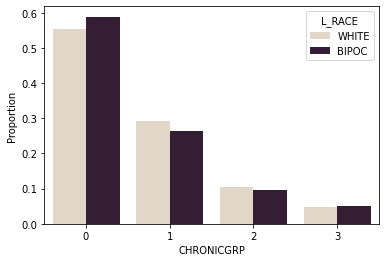

In [70]:
# Note this looks good / elegant, but takes an impossibly long time:
# sb.barplot(x='_IMPRACE', y='CHRONICGRP', data=brfss, estimator=lambda x: sum(x==0)*100.0/len(x))

# This doesn't look as good, but it only takes 1 second to run. :)
x, y, hue = "CHRONICGRP", "Proportion", "L_RACE"
hue_order = ["WHITE", "BIPOC"]
(brfss[x]
 .groupby(brfss[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sb.barplot, "data"), x=x, y=y, palette="ch:.25", hue=hue, hue_order=hue_order))

<AxesSubplot:xlabel='_INCOMG', ylabel='Proportion'>

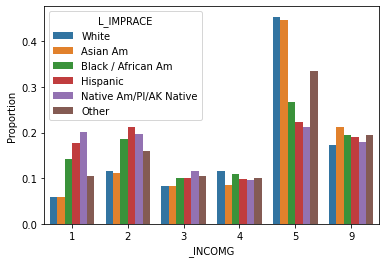

In [71]:
# INCOME GROUPS: 1 <$15K, 2 $15K-$25K, 3 $25K-$35K, 4 $35K-$50K, 5 $50K 9 REFUSED / BLANK
x, y, hue = "_INCOMG", "Proportion", "L_IMPRACE"
hue_order = ["White", "Asian Am", "Black / African Am", "Hispanic", "Native Am/PI/AK Native", "Other"]
(brfss[x]
 .groupby(brfss[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sb.barplot, "data"), x=x, y=y, hue=hue, hue_order=hue_order))

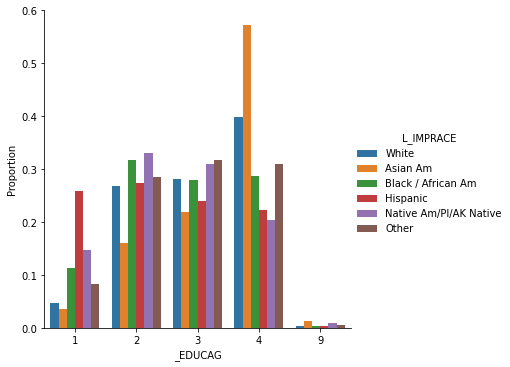

In [72]:
# _Educag 1 < HS, 2 HS GRAD, 3 SOME COLLEGE, 4 COLLEGE GRAD, 9 REFUSED / BLANK
x, y, hue = "_EDUCAG", "Proportion", "L_IMPRACE"
hue_order = ["White", "Asian Am", "Black / African Am", "Hispanic", "Native Am/PI/AK Native", "Other"]
sd = brfss["_EDUCAG"].groupby(brfss["L_IMPRACE"]).value_counts(normalize=True).rename(y).reset_index()
sb.catplot(x="_EDUCAG", y="Proportion", hue="L_IMPRACE", hue_order=hue_order, kind="bar", data=sd)

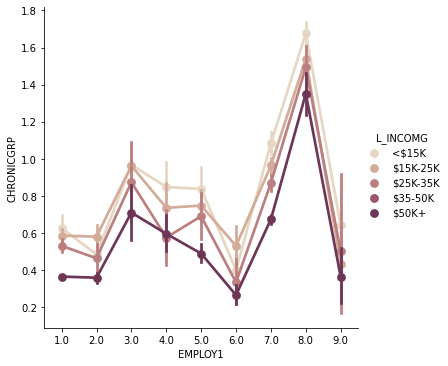

In [73]:
# Employ1: 1 Employed, 2 Self-Employed, 3 OOW 1+ yrs, 4 OOW <1 yr, 5 Homemaker, 6 Student, 
# 7 Retired, 8 Unable, _ Refused or Blank
hue_order = ["$15K", "$15K-25K", "$25K-35K", "$35-50K", "$50K+", ""]
sb.catplot(x="EMPLOY1", y="CHRONICGRP", hue="L_INCOMG", hue_order=hue_order, 
           kind="point", palette="ch:.25", data=brfss)

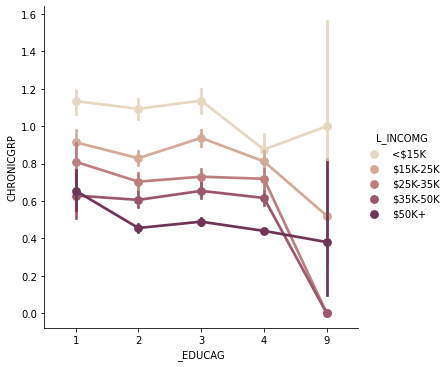

In [74]:
# People in technical jobs have more stress? 
# _Educag 1 < HS, 2 HS GRAD, 3 SOME COLLEGE, 4 COLLEGE GRAD, 9 REFUSED / BLANK
hue_order = ["$15K", "$15K-25K", "$25K-35K", "$35K-50K", "$50K+", ""]
sb.catplot(x="_EDUCAG", y="CHRONICGRP", hue="L_INCOMG", hue_order=hue_order, 
           kind="point", palette="ch:.25", data=brfss)

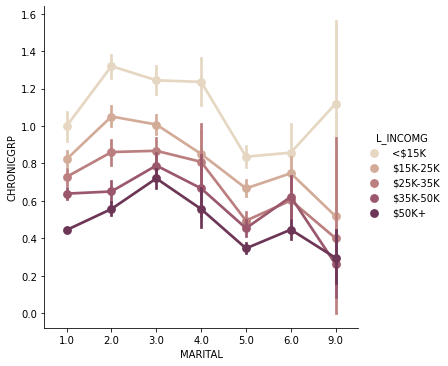

In [75]:
# MARITAL 1 Married 2 Divorced 3 Widowed 4 Separated 5 Never Married 6 Unmarried Couple 9 Refused / Blank
hue_order = ["$15K", "$15K-25K", "$25K-35K", "$35K-50K", "$50K+", ""]
sb.catplot(x="MARITAL", y="CHRONICGRP", hue="L_INCOMG", hue_order=hue_order, 
           kind="point", palette="ch:.25", data=brfss)

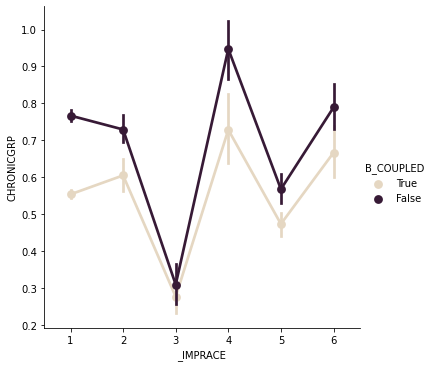

In [76]:
# Coupled is a computed variable where True = Married or Unmarried couple, and False = everything else
# _IMPRACE - 1 White 2 Black 3 Asian 4 Native / PI 5 Hispanic 6 Other
hue_order = [True, False]
sb.catplot(x="_IMPRACE", y="CHRONICGRP", hue="B_COUPLED", hue_order=hue_order,
           kind="point", palette="ch:.25", data=brfss)

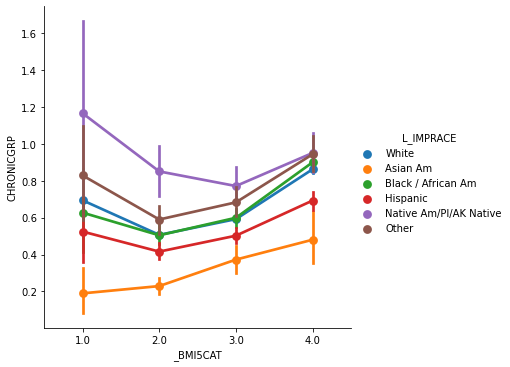

In [77]:
# BMI Groups 1: < 18.5 (Underweight), 2: 18.5 - 25 (Normal), 3: 25 - 30 (Overweight), 4: 30+ (Obese)
hue_order = ["White", "Asian Am", "Black / African Am", "Hispanic", "Native Am/PI/AK Native", "Other"]
sb.catplot(x="_BMI5CAT", y="CHRONICGRP", hue="L_IMPRACE", hue_order=hue_order,
           kind="point", data=brfss)

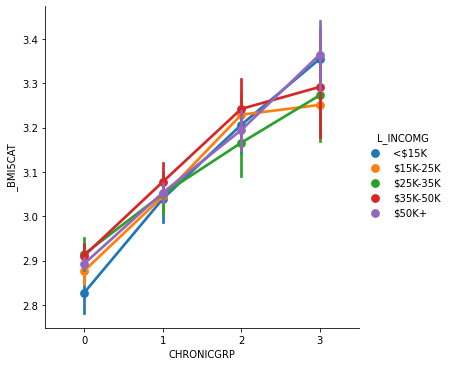

In [78]:
# No differences - BMI is a VERY STRONG predictor of chronic conditions
# BMI Groups 1: < 18.5 (Underweight), 2: 18.5 - 25 (Normal), 3: 25 - 30 (Overweight), 4: 30+ (Obese)
hue_order = ["$15K", "$15K-25K", "$25K-35K", "$35K-50K", "$50K+", ""]
sb.catplot(x="CHRONICGRP", y="_BMI5CAT", hue="L_INCOMG", hue_order=hue_order, 
           kind="point", data=brfss)

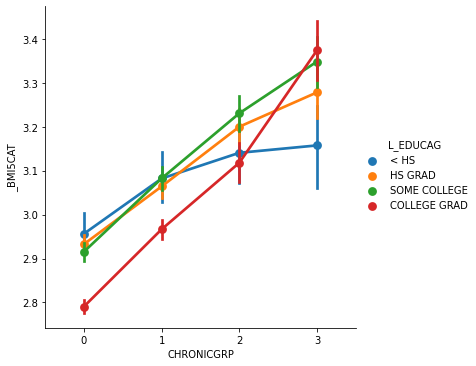

In [79]:
# Basically no difference 
# BMI Groups 1: < 18.5 (Underweight), 2: 18.5 - 25 (Normal), 3: 25 - 30 (Overweight), 4: 30+ (Obese)
hue_order = ["lt HS", "HS GRAD", "SOME COLLEGE", "COLLEGE GRAD", ""]
sb.catplot(x="CHRONICGRP", y="_BMI5CAT", hue="L_EDUCAG", hue_order=hue_order, 
           kind="point", data=brfss)

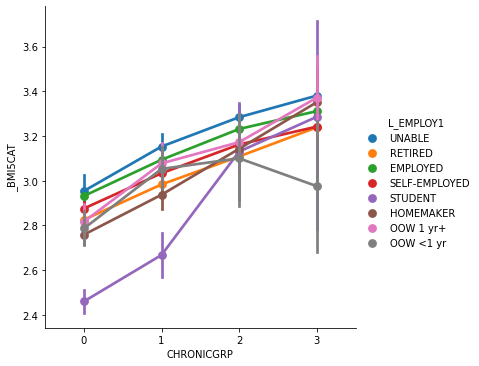

In [80]:
# BMI Groups 1: < 18.5 (Underweight), 2: 18.5 - 25 (Normal), 3: 25 - 30 (Overweight), 4: 30+ (Obese)
sb.catplot(x="CHRONICGRP", y="_BMI5CAT", hue="L_EMPLOY1", 
           kind="point", data=brfss)

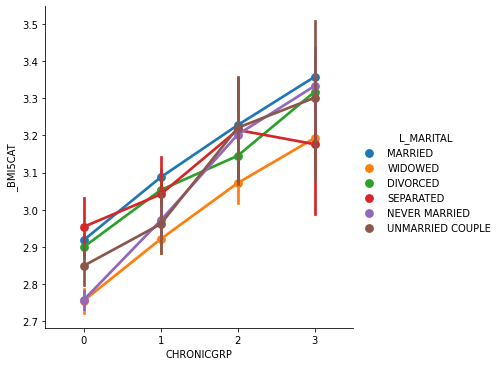

In [81]:
# BMI Groups 1: < 18.5 (Underweight), 2: 18.5 - 25 (Normal), 3: 25 - 30 (Overweight), 4: 30+ (Obese)
sb.catplot(x="CHRONICGRP", y="_BMI5CAT", hue="L_MARITAL", 
           kind="point", data=brfss)

In [82]:
map_df_dup = brfss.copy()
map_df_dup['WEIGHT'] = brfss["WEIGHT"].copy()
mapme = map_df_dup.groupby(['L_STATENM','L_STATEAB','YEAR']).apply(lambda dfx: (dfx["TOTCHRONIC"] * dfx["WEIGHT"]).sum() / dfx["WEIGHT"].sum()).reset_index()
mapme = mapme.rename(columns = {'L_STATENM':'StateName', 'L_STATEAB':'StateAbbr', 'YEAR':'Year', 0:'TotalComorb'})
mapme

,StateName,StateAbbr,Year,TotalComorb
0,Alabama,AL,2017,0.745275
1,Alabama,AL,2018,0.879185
2,Alabama,AL,2019,0.698989
3,Alaska,AK,2017,0.489418
4,Alaska,AK,2018,0.539646
...,...,...,...,...
153,Wisconsin,WI,2018,0.594586
154,Wisconsin,WI,2019,0.552620
155,Wyoming,WY,2017,0.632918
156,Wyoming,WY,2018,0.627746


In [83]:
# Thank you to Rachel for this code. :)
# NOTE: New Jersey only has data for 2 out of the 3 years - 2017 & 2018
import plotly.express as px
from textwrap import wrap

named_colorscales = px.colors.named_colorscales()
#print("\n".join(wrap("".join('{:<12}'.format(c) for c in named_colorscales), 96)))

fig = px.choropleth(mapme,  # Input Pandas DataFrame
                    locations = "StateAbbr",  # DataFrame column with locations
                    color = "TotalComorb",  # DataFrame column with color values
                    color_continuous_scale = 'turbo',
                    hover_name = "StateName", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Average Proportion of Comorbidities in the US by State', # Create a Title
    geo_scope ='usa',  # Plot only the USA instead of globe
)
fig.show()  

In [84]:
# BMI; how similar are they?
map_df_dup = brfss.copy()
map_df_dup['WEIGHT'] = brfss["WEIGHT"].copy()
mapme = map_df_dup.groupby(['L_STATENM','L_STATEAB','YEAR']).apply(lambda dfx: (dfx["_BMI5CAT"] * dfx["WEIGHT"]).sum() / dfx["WEIGHT"].sum()).reset_index()
mapme = mapme.rename(columns = {'L_STATENM':'StateName', 'L_STATEAB':'StateAbbr', 'YEAR':'Year', 0:'BMI_Prop'})
#mapme

In [85]:
# For Comparison - BMI Map
# NOTE: New Jersey only has data for 2 out of the 3 years - 2017 & 2018
import plotly.express as px
from textwrap import wrap

named_colorscales = px.colors.named_colorscales()
#print("\n".join(wrap("".join('{:<12}'.format(c) for c in named_colorscales), 96)))

fig = px.choropleth(mapme,  # Input Pandas DataFrame
                    locations = "StateAbbr",  # DataFrame column with locations
                    color = "BMI_Prop",  # DataFrame column with color values
                    color_continuous_scale = 'turbo',
                    hover_name = "StateName", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Average Proportion of BMI in the US by State', # Create a Title
    geo_scope ='usa',  # Plot only the USA instead of globe
)
fig.show()  

In [86]:
# INCOMEG
map_df_dup = brfss.copy()
map_df_dup['WEIGHT'] = brfss["WEIGHT"].copy()
mapme = map_df_dup.groupby(['L_STATENM','L_STATEAB','YEAR']).apply(lambda dfx: (dfx["_INCOMG"] * dfx["WEIGHT"]).sum() / dfx["WEIGHT"].sum()).reset_index()
mapme = mapme.rename(columns = {'L_STATENM':'StateName', 'L_STATEAB':'StateAbbr', 'YEAR':'Year', 0:'INCOME_Prop'})
#mapme

In [87]:
# For Comparison - INCOME Map
# NOTE: New Jersey only has data for 2 out of the 3 years - 2017 & 2018
import plotly.express as px
from textwrap import wrap

named_colorscales = px.colors.named_colorscales()
#print("\n".join(wrap("".join('{:<12}'.format(c) for c in named_colorscales), 96)))

fig = px.choropleth(mapme,  # Input Pandas DataFrame
                    locations = "StateAbbr",  # DataFrame column with locations
                    color = "INCOME_Prop",  # DataFrame column with color values
                    color_continuous_scale = 'turbo',
                    hover_name = "StateName", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Average Proportion of INCOME in the US by State', # Create a Title
    geo_scope ='usa',  # Plot only the USA instead of globe
)
fig.show() 

In [88]:
# EDUCAG
map_df_dup = brfss.copy()
map_df_dup['WEIGHT'] = brfss["WEIGHT"]
mapme = map_df_dup.groupby(['L_STATENM','L_STATEAB','YEAR']).apply(lambda dfx: (dfx["_EDUCAG"] * dfx["WEIGHT"]).sum() / dfx["WEIGHT"].sum()).reset_index()
mapme = mapme.rename(columns = {'L_STATENM':'StateName', 'L_STATEAB':'StateAbbr', 'YEAR':'Year', 0:'EDUC_Prop'})
#mapme

In [89]:
# For Comparison - EDUC Map
# NOTE: New Jersey only has data for 2 out of the 3 years - 2017 & 2018
import plotly.express as px
from textwrap import wrap

named_colorscales = px.colors.named_colorscales()
#print("\n".join(wrap("".join('{:<12}'.format(c) for c in named_colorscales), 96)))

fig = px.choropleth(mapme,  # Input Pandas DataFrame
                    locations = "StateAbbr",  # DataFrame column with locations
                    color = "EDUC_Prop",  # DataFrame column with color values
                    color_continuous_scale = 'turbo',
                    hover_name = "StateName", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Average Proportion of EDUCATION in the US by State', # Create a Title
    geo_scope ='usa',  # Plot only the USA instead of globe
)
fig.show()